In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [3]:
#seprating the dependent and independent variable
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [4]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X)

In [5]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaler_x, Y, train_size = 0.80, stratify = Y, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
classifier = DTC()
classifier.fit(x_train, y_train)
pred_values = classifier.predict(x_train)

# Hyperparameter Tuning

In [9]:
classifier1 = DTC()
classifier1.fit(x_train, y_train)

DecisionTreeClassifier()

!!!Chek Output here!!!

In [10]:
from sklearn.metrics import f1_score
def cal_score(model, x1, y1, x2, y2):
    model.fit(x1, y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    return f1, f2

In [14]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (5,5), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test score')
    plt.legend()
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.title(title)
    plt.show()

# max Depth

In [12]:
max_depth = [i for i in range(1,50) ]
train = []
test = []

for i in max_depth:
    model = DTC(class_weight = 'balanced', max_depth = i, random_state = 42)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

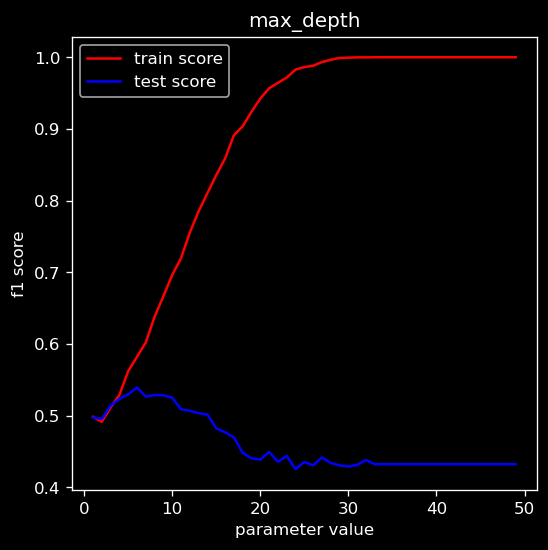

In [15]:
effect(train, test, range(1, 50), 'max_depth')

# min_samples_split

In [16]:
min_samples = [i for i in range(2,5000, 25) ]
train = []
test = []

for i in min_samples:
    model = DTC(class_weight = 'balanced', min_samples_split = i, random_state = 42)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

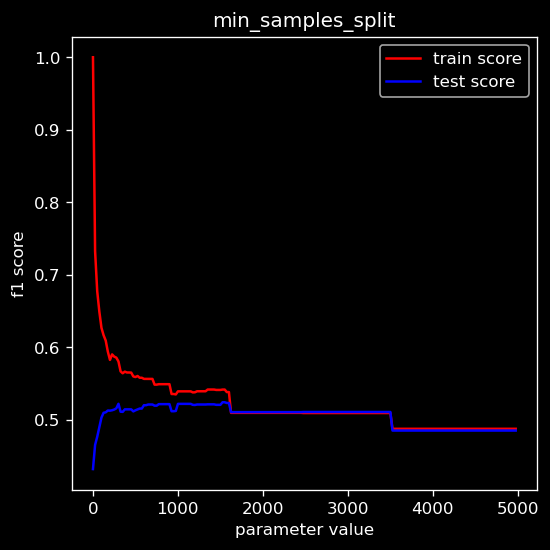

In [17]:
effect(train, test, range(2,5000, 25), 'min_samples_split')

# max_leaf_nodes

In [18]:
maxleafnodes = [i for i in range(2,200, 10) ]
train = []
test = []

for i in maxleafnodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes = i, random_state = 42)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

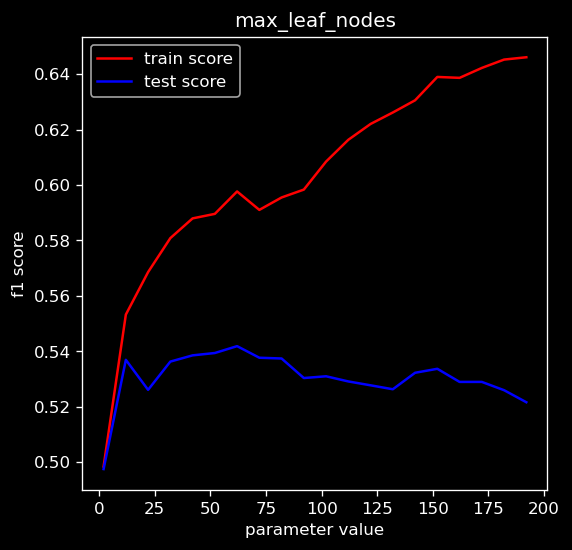

In [19]:
effect(train, test, range(2,200, 10), 'max_leaf_nodes')

# min_samples_leaf

In [20]:
min_samples = [i for i in range(2,4000, 25) ]
train = []
test = []

for i in min_samples:
    model = DTC(class_weight = 'balanced', min_samples_leaf = i, random_state = 42)
    f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
    train.append(f1)
    test.append(f2)

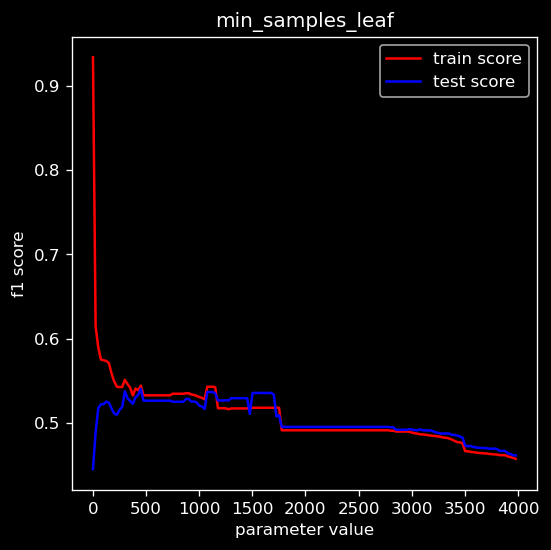

In [21]:
effect(train, test, range(2,4000, 25), 'min_samples_leaf')

# Feature Importance

In [23]:
model = DTC(max_depth = 9)
model.fit(x_train, y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

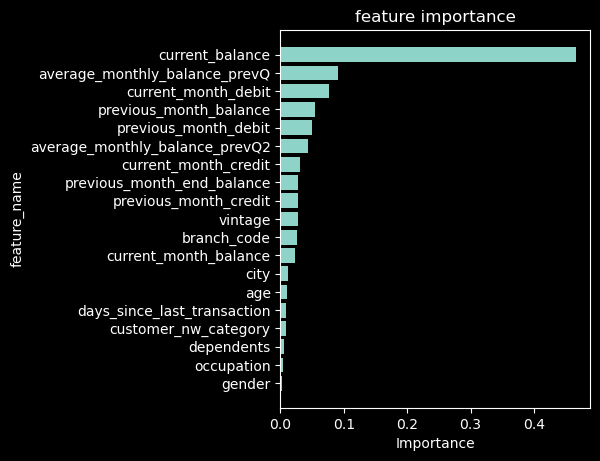

In [24]:
plt.figure(figsize = (4,5), dpi = 100)
plt.barh(k.index, k)
plt.xlabel('Importance')
plt.ylabel('feature_name')
plt.title('feature importance')